# 다항회귀분석  
앞에서 살펴본 단순회귀분석은 두 변수간의 관계를 직선 형태로 설명하는 알고리즘  
다항 함수를 사용하면 보다 복잡한 곡선 형태의 회귀선을 표현할 수 있음

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression      #선형회귀분석
from sklearn.preprocessing import PolynomialFeatures   #다항식 변환

In [3]:
df = pd.read_csv('../002/auto-mpg.csv', header=None)

In [4]:
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','name'] 

In [5]:
df['horsepower'].replace('?', np.nan, inplace=True)
df.dropna(subset=['horsepower'], axis=0, inplace=True)
df['horsepower'] = df['horsepower'].astype('float')

In [80]:
features = df[['mpg', 'cylinders', 'horsepower', 'weight']]

In [6]:
X=df[['weight']]  #독립 변수 X
y=df['mpg']       #종속 변수 Y

### train data 와 test data로 구분(7:3 비율)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [32]:
print('훈련 데이터: ', X_train.shape)
print('검증 데이터: ', X_test.shape)   

훈련 데이터:  (313, 1)
검증 데이터:  (79, 1)


## 다항식 변환

다항회귀분석은 2차함수 이상의 다함함수를 이용하여 두 변수간의 선형관계를 설명하는 알고리즘  
예를 들어 2차함수는 y = aX^2 + bX + c로 표시할 수 있으며, 학습을 통해 3개의 계수 a, b, c를 찾아서 모델을 완성함

#### 2차항 적용

In [33]:
poly = PolynomialFeatures(degree=3)

#### X_train 데이터를 2차항으로 변형

In [34]:
X_train = poly.fit_transform(X_train)

#### X_test 데이터를 2차항으로 변형

In [35]:
X_test = poly.fit_transform(X_test)  

In [18]:
print('기존 데이터: ', X_train.shape)
print('2차항 변환 데이터: ', X_train_poly.shape)  

기존 데이터:  (313, 3)


NameError: name 'X_train_poly' is not defined

In [108]:
X_train

,weight,horsepower,cylinders
151,2000.0,67.0,4
383,1965.0,67.0,4
70,4422.0,190.0,8
122,2660.0,110.0,4
212,4380.0,180.0,8
...,...,...,...
375,1980.0,74.0,4
322,2110.0,65.0,4
15,2833.0,95.0,6
127,2901.0,100.0,6


In [109]:
X_train_poly

array([[1.0000e+00, 2.0000e+03, 6.7000e+01, ..., 1.7956e+04, 1.0720e+03,
        6.4000e+01],
       [1.0000e+00, 1.9650e+03, 6.7000e+01, ..., 1.7956e+04, 1.0720e+03,
        6.4000e+01],
       [1.0000e+00, 4.4220e+03, 1.9000e+02, ..., 2.8880e+05, 1.2160e+04,
        5.1200e+02],
       ...,
       [1.0000e+00, 2.8330e+03, 9.5000e+01, ..., 5.4150e+04, 3.4200e+03,
        2.1600e+02],
       [1.0000e+00, 2.9010e+03, 1.0000e+02, ..., 6.0000e+04, 3.6000e+03,
        2.1600e+02],
       [1.0000e+00, 2.5600e+03, 9.5000e+01, ..., 3.6100e+04, 1.5200e+03,
        6.4000e+01]])

### train data를 가지고 모델 학습

In [36]:
pr = LinearRegression()
pr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
r_square = pr.score(X_test,y_test)
print(r_square)

0.71376243950938


#### train data의 산점도와 test data로 예측한 회귀선을 그래프로 출력 

In [112]:
y_hat_test = pr.predict(X_test_poly)

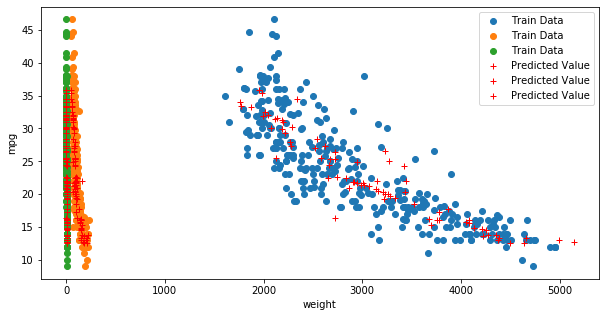

In [113]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(X_train, y_train, 'o', label='Train Data')  # 데이터 분포
ax.plot(X_test, y_hat_test, 'r+', label='Predicted Value') # 모형이 학습한 회귀선
ax.legend(loc='best')
plt.xlabel('weight')
plt.ylabel('mpg')
plt.show()

#### 모형에 전체 X 데이터를 입력하여 예측한 값 y_hat을 실제 값 y와 비교 

In [114]:
X_ploy = poly.fit_transform(X)
y_hat = pr.predict(X_ploy)

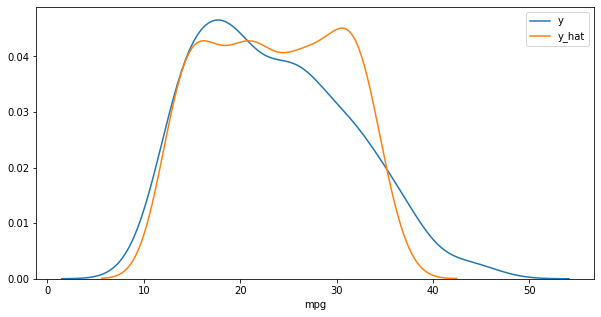

In [115]:
plt.figure(figsize=(10, 5))
ax1 = sns.distplot(y, hist=False, label="y")
ax2 = sns.distplot(y_hat, hist=False, label="y_hat", ax=ax1)
plt.show()